# GAN on MNIST
Here is a generative adversarial network aka GAN, which gets trained on the MNIST dataset and in the end, the model is capable of producing handwritten digits, looking like the MNIST samples.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

# Data import and preprocessing

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#normalize and center at 0
X_train = X_train / 255.0 * 2 - 1
X_test = X_test / 255.0 * 2 - 1

In [7]:
X_train.shape

(60000, 28, 28)

In [0]:
#Number of instances, Height of the image, Weight of the image:
N, H, W = X_train.shape
# total length of the input image:
D = H * W
#reshaping the image so that it becomes a 1D array of length H*W
X_train = X_train.reshape(-1, D)
X_test = X_test.reshape(-1, D)

latent_dimention = 200

In [9]:
X_train.shape

(60000, 784)

# Creating the model
The GAN architecure consists of two main parts:
1.  a **discriminator** which is responsible for evaluting an image and clarify if it is a real image, or a meaningless set of pixels.
2.  a **generator** which performs the task of creating new images. The input to this model is just noise, and the output is expected to be an image similar to the training dataset.

In the process of training, the discriminator evolves to be able to tell real images and fake images apart. In the meantime, the generator must evolve so that it can produce images that can fool the discriminator. 

In [0]:
#discriminator
di = Input(D)
dx = Dense(256, activation=LeakyReLU(alpha=0.2))(di)
dx = Dense(362, activation=LeakyReLU(alpha=0.2))(di)
dx = Dense(512, activation=LeakyReLU(alpha=0.2))(dx)
dx = Dense(1, activation="sigmoid")(dx)

discriminator = Model(di, dx)

discriminator.compile(
    loss="binary_crossentropy",
    optimizer=Adam(0.0002, 0.5),
    metrics=["accuracy"]
)

discriminator.trainable = False 

In [0]:
#generator
gi = Input(shape=latent_dimention)
gx = Dense(256, activation=LeakyReLU(alpha=0.2))(gi)
gx = Dense(512, activation=LeakyReLU(alpha=0.2))(gx)
gx = Dense(1024, activation=LeakyReLU(alpha=0.2))(gx)
gx = Dense(D, activation="tanh")(gx)

generator = Model(gi, gx)

In [0]:
# here's a mixed model, responsible for improving the generator.
z = Input(shape=(latent_dimention,))

img = generator(z)

fake_pred = discriminator(img)

mixed_model =  Model(z, fake_pred)

mixed_model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(0.0002, 0.5)
)

# The training phase
Here, I iterate for 30000 thousand epochs, with the batch size of 32. These constants have been chosen arbitrarily. In each epoch, the generator creates some fake images. The fake images, and also some true data samples from the mnist dataset, are being fed to the discriminator so that it learns how to distinguish noise from true hand-written digits.

There is also a mixed_model which consists of a generator and a discriminator. This is where the generator learns to produce the desired replicates of the digits. 

In [0]:
batch_size = 32
epochs = 30000
ones = np.ones(batch_size)
zeros = np.zeros(batch_size)

In [0]:
for epoch in range(epochs):
  idx = np.random.randint(0, X_train.shape[0], batch_size)
  real_images = X_train[idx]

  noise = np.random.randn(batch_size, latent_dimention)
  fake_images = generator.predict(noise)

  discriminator.train_on_batch(real_images, ones)
  discriminator.train_on_batch(fake_images, zeros)


  noise = np.random.randn(batch_size, latent_dimention)
  mixed_model.train_on_batch(noise, ones)

  print(epoch)

For the sake of a good looking notebook, I have ommited the output of the above cell. It simply prints the epoch number to give you a sense of progress. Later I would probably add a more meaningful progess report.

# How good is the generator now?

In [17]:
noise = np.random.randn(10, latent_dimention)
noise.shape

(10, 200)

In [0]:
preds = generator.predict(noise)

In [22]:
preds.shape

(10, 784)

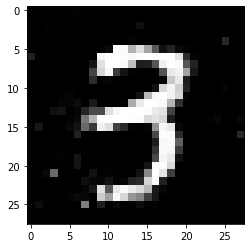

In [26]:
plt.imshow(preds[3].reshape(28, 28), cmap="gray")

# What's next?

This example seems acceptable, but there were a few not-so-much-like-a-number cases in the predictions. I think the next steps would be:
-  trying more layers for both generator and discriminator
-  trying some convolution layers
-  trying it on fashion-mnist dataset
-  tracking the loss through to train process. 

and also,  the LeakyRelu activation was just a suggestion from some StackOverflow post and I honestly don't know why it works. The regular relu wasn't producing satisfying results.

Furthermore, I'm curious to see if I can make it a bit more interactive, so that the generator gets the desired number as input and tries to reproduce it. At the moment I'm not sure it's possible, at least with these not-so-deep models. Let's see what happens :)